# **Entrega 01: Projeto Interdisciplinar: Ciência de Dados**

 **Estudantes:**
  - André Gregório dos Santos – RA: 24026489
  - Guilherme Reis Fogolin de Godoy – RA: 24026241
  - Pedro Henrique Nascimento Lemos – RA: 23025380
  - Yan Ramos Cezareto – RA: 24026005


🆘 Importante! Devidas descrições e demais informações estão disponíveis no arquivo PDF. Para acesso: **[Entrega 01 - Professor Savino](https://github.com/2025-2-NCC4/Projeto6/tree/main/documentos/Entrega01/Projeto)**.

## Importação dos dados

Estes códigos fazem o upload e leitura de quatro arquivos CSV usando pandas, criando Data Frames com informações de players, transações, pedestres e lojas, prontos para análise e manipulação no Python.

In [1]:
from google.colab import files

# Escolha e faça upload dos arquivos

uploaded = files.upload()


Saving PicMoney-Massa_de_Teste_com_Lojas_e_Valores.csv to PicMoney-Massa_de_Teste_com_Lojas_e_Valores.csv
Saving PicMoney-Base_Cadastral_de_Players.csv to PicMoney-Base_Cadastral_de_Players.csv
Saving PicMoney-Base_de_Transa__es_-_Cupons_Capturado.csv to PicMoney-Base_de_Transa__es_-_Cupons_Capturado.csv
Saving PicMoney-Base_Simulada_-_Pedestres_Av__Paulista.csv to PicMoney-Base_Simulada_-_Pedestres_Av__Paulista.csv


In [2]:
# Renomeando os arquivos

import pandas as pd

players = pd.read_csv("PicMoney-Base_Cadastral_de_Players.csv", encoding='latin-1', sep=';')
transacoes = pd.read_csv("PicMoney-Base_de_Transa__es_-_Cupons_Capturado.csv", encoding='latin-1', sep=';')
pedestres = pd.read_csv("PicMoney-Base_Simulada_-_Pedestres_Av__Paulista.csv", encoding='latin-1', sep=';')
lojas = pd.read_csv("PicMoney-Massa_de_Teste_com_Lojas_e_Valores.csv", encoding='latin-1', sep=';')

## Limpeza dos dados

O objetivo da limpeza dos dados é garantir a confiabilidade e a consistência das informações, permitindo análises precisas sobre o comportamento dos usuários, o desempenho das transações e o perfil das lojas parceiras. Ao remover inconsistências, tratar valores ausentes, padronizar categorias e corrigir formatos incorretos, a base torna-se mais organizada e pronta para gerar insights confiáveis, apoiando decisões estratégicas e evitando conclusões equivocadas.

In [3]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import re

# --- Leitura dos CSVs ---
players = pd.read_csv("PicMoney-Base_Cadastral_de_Players.csv", encoding='latin-1', sep=';')
transacoes = pd.read_csv("PicMoney-Base_de_Transa__es_-_Cupons_Capturado.csv", encoding='latin-1', sep=';')
pedestres = pd.read_csv("PicMoney-Base_Simulada_-_Pedestres_Av__Paulista.csv", encoding='latin-1', sep=';')
lojas = pd.read_csv("PicMoney-Massa_de_Teste_com_Lojas_e_Valores.csv", encoding='latin-1', sep=';')


In [4]:
# --- Mapas para padronização ---

mapa_estabelecimentos = {
    "Habib's": "Fast Food & Lanchonetes", "Subway": "Fast Food & Lanchonetes",
    "Burger King": "Fast Food & Lanchonetes", "McDonald's": "Fast Food & Lanchonetes",
    "Açaí no Ponto": "Fast Food & Lanchonetes",
    "Outback": "Restaurantes & Gastronomia", "Octavio Café": "Restaurantes & Gastronomia",
    "Madero": "Restaurantes & Gastronomia", "Café Cultura": "Restaurantes & Gastronomia",
    "Churrascaria Boi Preto": "Restaurantes & Gastronomia", "Ráscal": "Restaurantes & Gastronomia",
    "Smart Fit": "Academias", "Selfit": "Academias", "Just Run": "Academias",
    "Forever 21": "Moda & Varejo", "Renner": "Moda & Varejo", "Riachuelo": "Moda & Varejo",
    "Lojas Americanas": "Moda & Varejo", "Havaianas": "Moda & Varejo",
    "Sabin": "Saúde & Bem-estar", "Lavoisier": "Saúde & Bem-estar", "Fleury": "Saúde & Bem-estar",
    "Clube Pinheiros": "Saúde & Bem-estar", "Droga Raia": "Farmácias", "Drogasil": "Farmácias",
    "Drogaria São Paulo": "Farmácias", "Extra": "Supermercados & Mercados",
    "Carrefour Express": "Supermercados & Mercados", "Pão de Açúcar": "Supermercados & Mercados",
    "Extra Mercado": "Supermercados & Mercados", "Starbucks": "Cafeterias",
    "Ponto": "Lojas de Departamento & Eletrodomésticos", "Casas Bahia": "Lojas de Departamento & Eletrodomésticos",
    "Magazine Luiza": "Lojas de Departamento & Eletrodomésticos", "Fast Shop": "Lojas de Departamento & Eletrodomésticos",
    "Ponto Frio": "Lojas de Departamento & Eletrodomésticos", "Sesc Paulista": "Cultura & Lazer",
    "Sesc Carmo": "Cultura & Lazer", "Livraria Cultura": "Cultura & Lazer", "Kalunga": "Papelaria e Escritório",
    "Daiso Japan": "Lojas de Variedades"
}

mapa_lojas_pedestres = {
    'mercado express': 'Supermercados & Mercados', 'outros': 'Outros',
    'restaurante': 'Restaurantes & Gastronomia', 'esportivo': 'Artigos Esportivos',
    'farmácia': 'Farmácias', 'eletrodoméstico': 'Lojas de Departamento & Eletrodomésticos',
    'vestuário': 'Moda & Varejo', 'móveis': 'Móveis e Decoração', 'N/A': 'Não informado'
}

In [5]:
# --- Função para corrigir coordenadas ---

def ajustar_coordenada(valor):
    if isinstance(valor, str):
        partes = valor.split('.')
        if len(partes) > 2:
            return partes[0] + '.' + ''.join(partes[1:])
    return valor

In [6]:
# --- Limpeza players ---

players['celular'] = players['celular'].astype(str).str.replace(r'\D', '', regex=True)
players['data_nascimento'] = pd.to_datetime(players['data_nascimento'], format='%d/%m/%Y', errors='coerce')
for coluna in ['cidade_trabalho', 'bairro_trabalho', 'cidade_escola', 'bairro_escola', 'categoria_frequentada']:
    players[coluna] = players[coluna].fillna('Não informado')

players.to_csv('players_limpos.csv', index=False)

In [7]:
# --- Limpeza transações ---

transacoes['celular'] = transacoes['celular'].astype(str).str.replace(r'\D', '', regex=True)
transacoes['data'] = pd.to_datetime(transacoes['data'], format='%d/%m/%Y', errors='coerce')
transacoes['hora'] = transacoes['hora'].astype(str)
transacoes['produto'].fillna('N/A', inplace=True)
transacoes['valor_cupom'] = pd.to_numeric(transacoes['valor_cupom'], errors='coerce')
transacoes['repasse_picmoney'] = pd.to_numeric(transacoes['repasse_picmoney'], errors='coerce')
transacoes.dropna(subset=['valor_cupom', 'repasse_picmoney'], inplace=True)
transacoes['categoria_estabelecimento'] = transacoes['nome_estabelecimento'].map(mapa_estabelecimentos).fillna('Outros')

transacoes.to_csv('transacoes_limpos.csv', index=False)

/tmp/ipython-input-3586158062.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  transacoes['produto'].fillna('N/A', inplace=True)


In [8]:
# --- Limpeza Pedestres ---

pedestres['celular'] = pedestres['celular'].astype(str).str.replace(r'\D', '', regex=True)
pedestres['latitude'] = pd.to_numeric(pedestres['latitude'].astype(str).apply(ajustar_coordenada), errors='coerce')
pedestres['longitude'] = pd.to_numeric(pedestres['longitude'].astype(str).apply(ajustar_coordenada), errors='coerce')
pedestres['data'] = pd.to_datetime(pedestres['data'], format='%d/%m/%Y', errors='coerce')
pedestres['data_ultima_compra'] = pd.to_datetime(pedestres['data_ultima_compra'], format='%d/%m/%Y', errors='coerce')
pedestres['possui_app_picmoney'] = pedestres['possui_app_picmoney'].map({'Sim': True, 'Não': False})
pedestres['ultimo_tipo_cupom'].fillna('N/A', inplace=True)
pedestres['ultimo_valor_capturado'].fillna(0, inplace=True)
pedestres['ultimo_tipo_loja'] = pedestres['ultimo_tipo_loja'].map(mapa_lojas_pedestres).fillna('Não informado')

pedestres.to_csv('pedestres_limpos.csv', index=False)

/tmp/ipython-input-996019245.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pedestres['ultimo_tipo_cupom'].fillna('N/A', inplace=True)
/tmp/ipython-input-996019245.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [9]:
# --- Limpeza lojas ---

lojas['numero_celular'] = lojas['numero_celular'].astype(str).str.replace(r'\D', '', regex=True)
lojas['latitude'] = pd.to_numeric(lojas['latitude'].astype(str).apply(ajustar_coordenada), errors='coerce')
lojas['longitude'] = pd.to_numeric(lojas['longitude'].astype(str).apply(ajustar_coordenada), errors='coerce')
lojas['data_captura'] = pd.to_datetime(lojas['data_captura'], format='%d/%m/%Y', errors='coerce')
lojas['valor_compra'] = pd.to_numeric(lojas['valor_compra'], errors='coerce')
lojas['valor_cupom'] = pd.to_numeric(lojas['valor_cupom'], errors='coerce')
lojas.dropna(subset=['valor_compra', 'valor_cupom'], inplace=True)

lojas.to_csv('lojas_limpos.csv', index=False)

In [10]:
print("Limpeza concluída! Arquivos limpos gerados com sucesso.")

Limpeza concluída! Arquivos limpos gerados com sucesso.


## Exploração De Dados

O objetivo da análise de KPIs e da exploração inicial dos dados é obter uma visão clara e quantitativa do comportamento dos usuários, das transações e do perfil das lojas parceiras. Por meio de indicadores-chave e visualizações, é possível identificar padrões, tendências e oportunidades de melhoria, permitindo tomadas de decisão mais embasadas e destacando insights estratégicos que apoiam o crescimento e a eficiência do negócio.

### Bibliotecas e leituras

In [11]:
# Importando bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Leitura dos CSVs ---
players = pd.read_csv("PicMoney-Base_Cadastral_de_Players.csv", encoding='latin-1', sep=';')
transacoes = pd.read_csv("PicMoney-Base_de_Transa__es_-_Cupons_Capturado.csv", encoding='latin-1', sep=';')
pedestres = pd.read_csv("PicMoney-Base_Simulada_-_Pedestres_Av__Paulista.csv", encoding='latin-1', sep=';')
lojas = pd.read_csv("PicMoney-Massa_de_Teste_com_Lojas_e_Valores.csv", encoding='latin-1', sep=';')


### Exploração inicial dos dados

In [12]:
print("---- Players ----")
print(players.shape)
print(players.head())
print(players.describe())

---- Players ----
(10000, 11)
           celular data_nascimento  idade       sexo cidade_residencial  \
0  (11) 91409-5506      12/10/1969     55  Masculino         SÃ£o Paulo   
1  (11) 91520-1488      19/02/1981     44  Masculino         SÃ£o Paulo   
2  (11) 98359-5557      10/09/1979     45  Masculino         SÃ£o Paulo   
3  (11) 96514-2674      05/03/1957     68  Masculino         SÃ£o Paulo   
4  (11) 99785-3045      30/10/1969     55   Feminino         SÃ£o Paulo   

  bairro_residencial cidade_trabalho bairro_trabalho cidade_escola  \
0                SÃ©             NaN             NaN           NaN   
1           Ipiranga             NaN             NaN           NaN   
2            Santana             NaN             NaN           NaN   
3              Penha             NaN             NaN           NaN   
4           TatuapÃ©             NaN             NaN           NaN   

  bairro_escola                           categoria_frequentada  
0           NaN                 

In [13]:
print("\n---- Transações ----")
print(transacoes.shape)
print(transacoes.head())


---- Transações ----
(100000, 12)
           celular        data      hora nome_estabelecimento  \
0  (61) 96497-8673  10/07/2025  16:15:00              Habib's   
1  (11) 94231-6424  15/07/2025  08:15:00            Smart Fit   
2  (11) 97965-2178  20/07/2025  16:45:00              Outback   
3  (11) 93418-4646  20/07/2025  15:45:00               Subway   
4  (11) 97973-1725  07/07/2025  11:00:00        Octavio CafÃ©   

  bairro_estabelecimento               categoria_estabelecimento id_campanha  \
0             RepÃºblica           Lojas de EletrÃ´nicos e Games     CAM2768   
1          Vila Prudente           Lojas de EletrÃ´nicos e Games     CAM6679   
2               Tucuruvi   Igrejas e Lojas de Artigos Religiosos     CAM6473   
3                  Penha  Fisioterapia e Terapias Complementares     CAM8293   
4            Santo Amaro      ClÃ­nicas MÃ©dicas e LaboratÃ³rios     CAM5588   

    id_cupom tipo_cupom  produto  valor_cupom  repasse_picmoney  
0  CUP542835   Cashback    

In [14]:
print("\n---- Pedestres ----")
print(pedestres.shape)
print(pedestres.head())


---- Pedestres ----
(100000, 15)
           celular        data   horario                      local  \
0  (11) 98549-4373  22/07/2025  07:30:00  Ponto de Ãnibus Pamplona   
1  (11) 91137-2716  22/07/2025  12:45:00   Ponto de Ãnibus Augusta   
2  (11) 99552-6219  22/07/2025  06:30:00   Shopping PÃ¡tio Paulista   
3  (11) 94777-4030  22/07/2025  19:00:00        MetrÃ´ ConsolaÃ§Ã£o   
4  (21) 91994-3239  22/07/2025  13:00:00         Esquina Rua da Paz   

                  latitude                longitude tipo_celular  \
0  -23.567.430.342.750.400   -4.664.844.333.528.140       iPhone   
1  -23.558.687.303.969.100   -4.665.888.408.315.560      Android   
2  -23.570.847.016.535.100  -46.645.781.836.865.100      Android   
3   -2.355.617.081.756.250   -4.666.130.627.469.660      Android   
4   -2.356.254.630.989.870   -4.664.956.662.319.300       iPhone   

         modelo_celular possui_app_picmoney data_ultima_compra  \
0             iPhone SE                 Sim         22/06/2025  

In [15]:
print("\n---- Lojas ----")
print(lojas.shape)
print(lojas.head())


---- Lojas ----
(10000, 11)
    numero_celular data_captura tipo_cupom   tipo_loja  \
0  (41) 96047-8110   05/07/2025    Produto      outros   
1  (11) 94020-8306   12/07/2025   Desconto     mÃ³veis   
2  (11) 92863-4530   19/07/2025    Produto     mÃ³veis   
3  (11) 94282-1224   19/07/2025    Produto  vestuÃ¡rio   
4  (11) 91506-1278   05/07/2025    Produto      outros   

                local_captura                 latitude  \
0         CalÃ§ada aleatÃ³ria  -23.563.850.985.754.000   
1         CalÃ§ada aleatÃ³ria   -2.356.380.569.343.850   
2  Shopping Cidade SÃ£o Paulo  -23.563.227.246.012.400   
3                   SemÃ¡foro   -2.356.152.623.615.530   
4    Shopping PÃ¡tio Paulista   -2.357.068.984.231.570   

                 longitude         nome_loja  \
0   -4.665.004.147.929.030  PÃ£o de AÃ§Ãºcar   
1   -4.664.954.309.104.300  PÃ£o de AÃ§Ãºcar   
2   -4.665.237.324.108.700           Kalunga   
3   -4.665.376.976.958.120       Daiso Japan   
4  -46.645.488.231.986.900       

### Análise de KPIs básicos

In [16]:
# Análise de KPIs básicos

print("\n=== KPIs ===")

# Número de jogadores únicos
print("Número de jogadores:", players['celular'].nunique())

# Número de transações
print("Número total de transações:", len(transacoes))

# Categorias de transações
print("\nCategorias de transações:")
print(transacoes['tipo_cupom'].value_counts())

# Número de pedestres únicos
print("\nNúmero de pedestres registrados:", pedestres['celular'].nunique())

# Número de lojas cadastradas
print("\nNúmero de lojas:", lojas['nome_loja'].nunique())


=== KPIs ===
Número de jogadores: 9999
Número total de transações: 100000

Categorias de transações:
tipo_cupom
Cashback    33556
Produto     33328
Desconto    33116
Name: count, dtype: int64

Número de pedestres registrados: 99935

Número de lojas: 15


### Análise Exploratória de Dados (EDA)

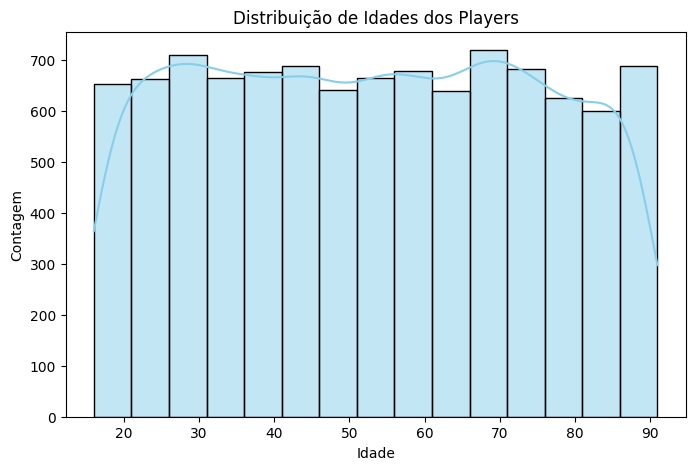

In [17]:
# Distribuição de idades dos players

plt.figure(figsize=(8,5))
sns.histplot(players['idade'], bins=15, kde=True, color='skyblue')
plt.title("Distribuição de Idades dos Players")
plt.xlabel("Idade")
plt.ylabel("Contagem")
plt.show()

/tmp/ipython-input-1265204401.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sexo', data=players, palette='Set2')


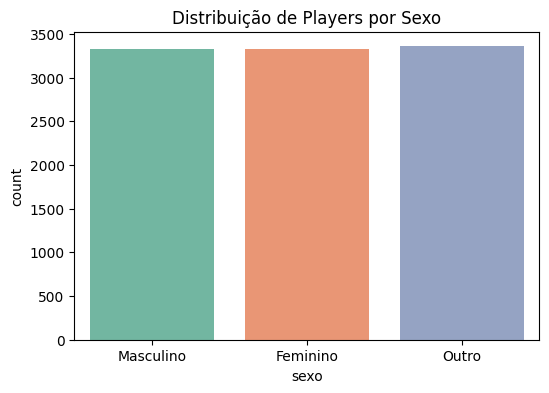

In [18]:
# Distribuição por sexo

plt.figure(figsize=(6,4))
sns.countplot(x='sexo', data=players, palette='Set2')
plt.title("Distribuição de Players por Sexo")
plt.show()

/tmp/ipython-input-93017246.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_transacoes.values, y=top_transacoes.index, palette='magma')


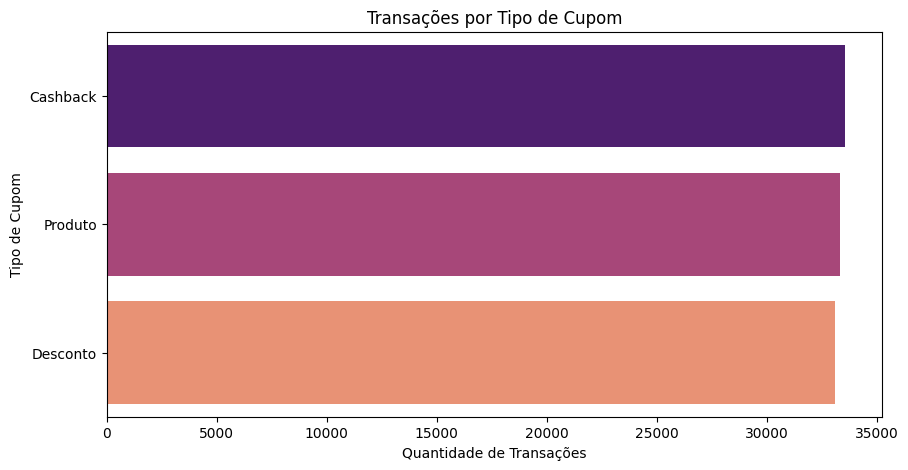

In [19]:
# Transações por categoria de estabelecimento

top_transacoes = transacoes['tipo_cupom'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x=top_transacoes.values, y=top_transacoes.index, palette='magma')
plt.title("Transações por Tipo de Cupom")
plt.xlabel("Quantidade de Transações")
plt.ylabel("Tipo de Cupom")
plt.show()

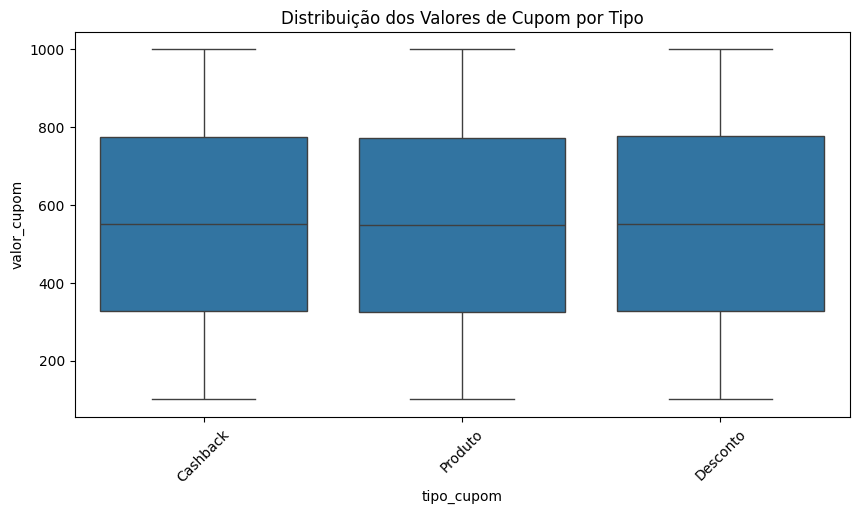

In [20]:
# Valor médio dos cupons por categoria

plt.figure(figsize=(10,5))
sns.boxplot(x='tipo_cupom', y='valor_cupom', data=transacoes)
plt.title("Distribuição dos Valores de Cupom por Tipo")
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-232482745.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categorias.values, y=top_categorias.index, palette='viridis')


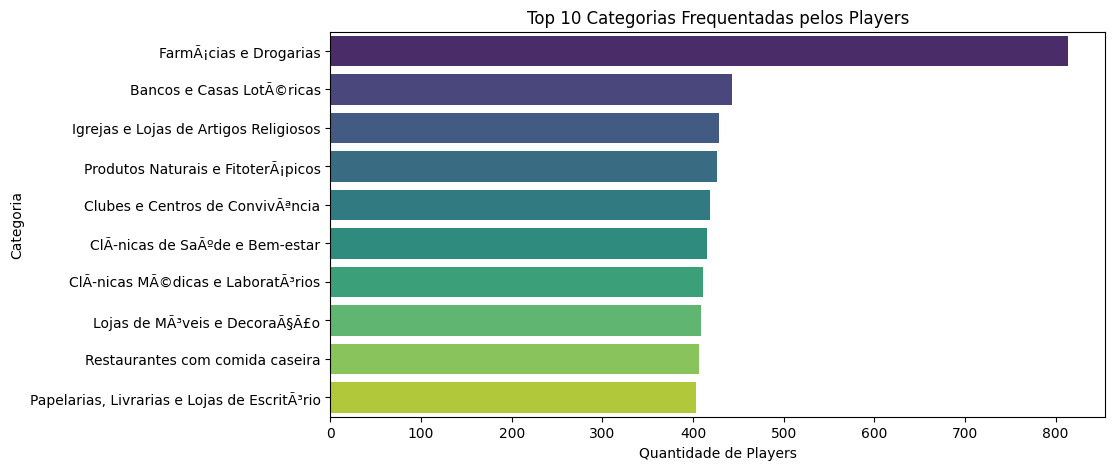

In [21]:
# Top 10 categorias frequentadas

top_categorias = players['categoria_frequentada'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_categorias.values, y=top_categorias.index, palette='viridis')
plt.title("Top 10 Categorias Frequentadas pelos Players")
plt.xlabel("Quantidade de Players")
plt.ylabel("Categoria")
plt.show()

/tmp/ipython-input-529932688.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_10_bairros.values, y=top_10_bairros.index, palette='viridis', orient='h')


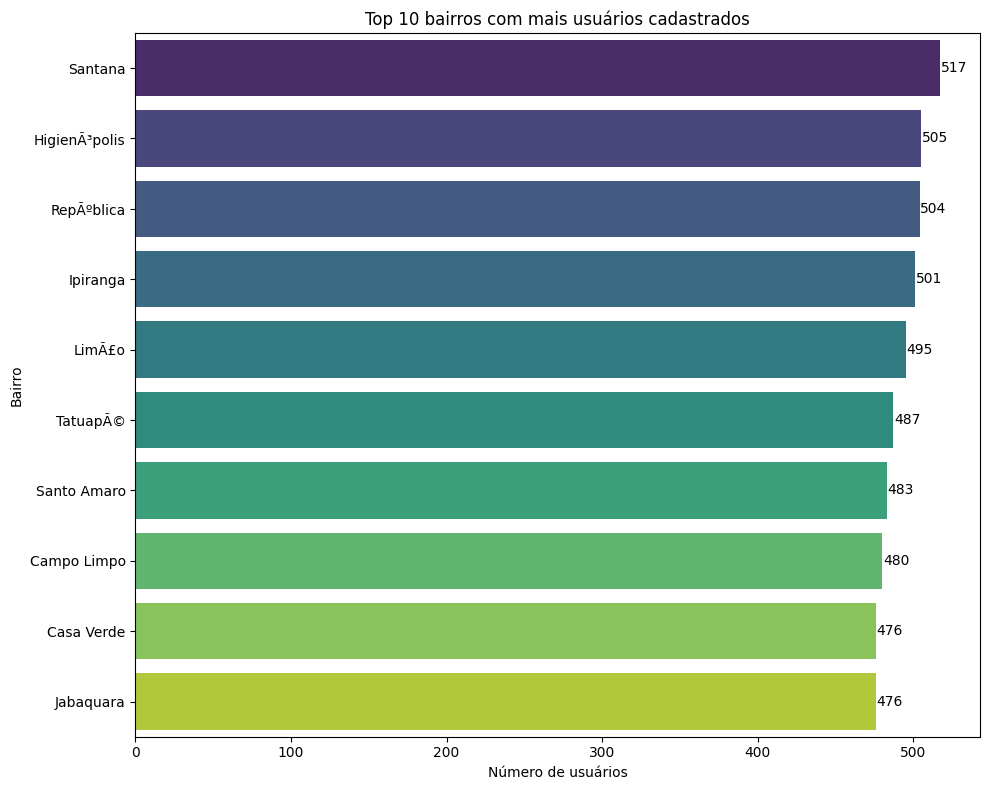

In [22]:
# Top 10 bairros

plt.figure(figsize=(10, 8))
top_10_bairros = players['bairro_residencial'].value_counts().nlargest(10)
ax = sns.barplot(x=top_10_bairros.values, y=top_10_bairros.index, palette='viridis', orient='h')

for p in ax.patches:
    width = p.get_width()
    ax.text(
        width + 0.5,
        p.get_y() + p.get_height() / 2,
        f'{int(width)}',
        ha='left',
        va='center')
plt.title('Top 10 bairros com mais usuários cadastrados')
plt.xlabel('Número de usuários')
plt.ylabel('Bairro')
plt.tight_layout()
plt.show()

/tmp/ipython-input-1523543662.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=transacoes_por_dia.index, y=transacoes_por_dia.values, palette='viridis')


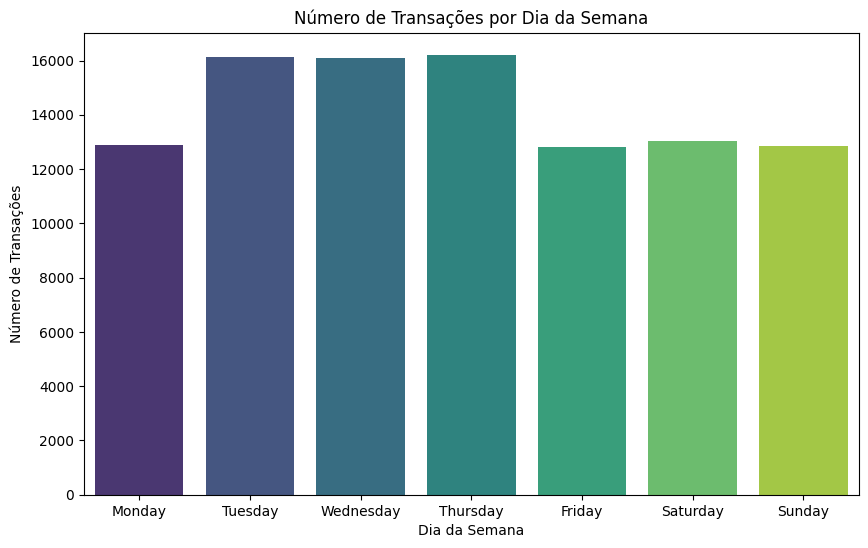

In [23]:
# Transações por dia da semana

transacoes['data'] = pd.to_datetime(transacoes['data'], format='%d/%m/%Y')
transacoes['dia_da_semana'] = transacoes['data'].dt.day_name()
dias_ordem = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
transacoes_por_dia = transacoes['dia_da_semana'].value_counts().reindex(dias_ordem)
plt.figure(figsize=(10, 6))
sns.barplot(x=transacoes_por_dia.index, y=transacoes_por_dia.values, palette='viridis')
plt.title('Número de Transações por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Número de Transações')
plt.show()